# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tahta
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | henties bay
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | port-gentil
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | paamiut
Processing Record 11 of Set 1 | maarianhamina
Processing Record 12 of Set 1 | aklavik
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | necochea
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | b

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns = 
["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]
)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tahta,26.7693,31.5021,56.37,37,100,6.96,EG,1675878430
1,tasiilaq,65.6145,-37.6368,3.36,54,0,10.40,GL,1675878431
2,henties bay,-22.1160,14.2845,65.30,84,61,12.17,NA,1675878431
3,punta arenas,-53.1500,-70.9167,71.71,43,100,10.36,CL,1675878430
4,port-gentil,-0.7193,8.7815,84.16,79,40,6.91,GA,1675878432


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tahta,26.7693,31.5021,56.37,37,100,6.96,EG,1675878430
1,tasiilaq,65.6145,-37.6368,3.36,54,0,10.40,GL,1675878431
2,henties bay,-22.1160,14.2845,65.30,84,61,12.17,NaN,1675878431
3,punta arenas,-53.1500,-70.9167,71.71,43,100,10.36,CL,1675878430
4,port-gentil,-0.7193,8.7815,84.16,79,40,6.91,GA,1675878432


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

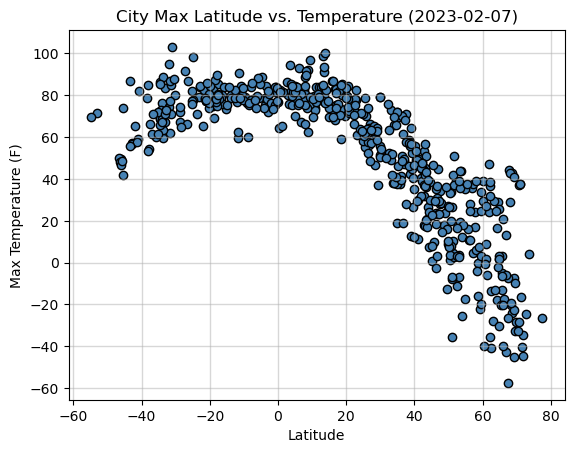

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor= "steelblue", edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle= '-', linewidth= 1, alpha= 0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

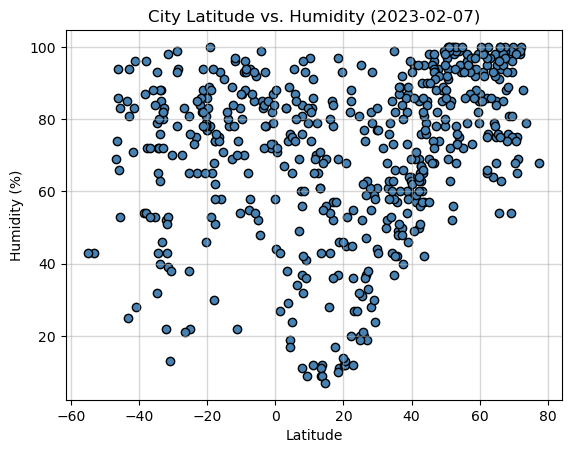

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor= "steelblue", edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle= '-', linewidth= 1, alpha= 0.5)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

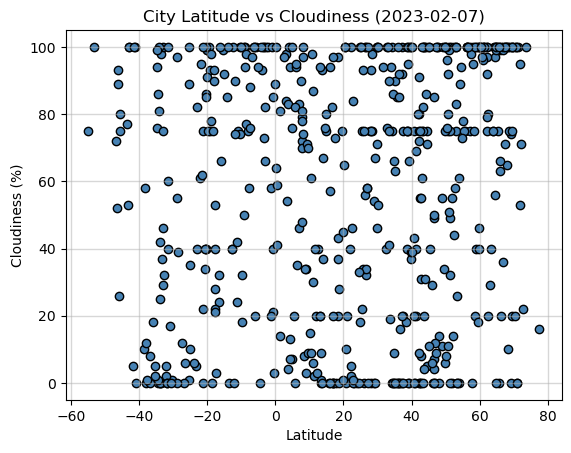

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor= "steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle= '-', linewidth= 1, alpha= 0.5)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

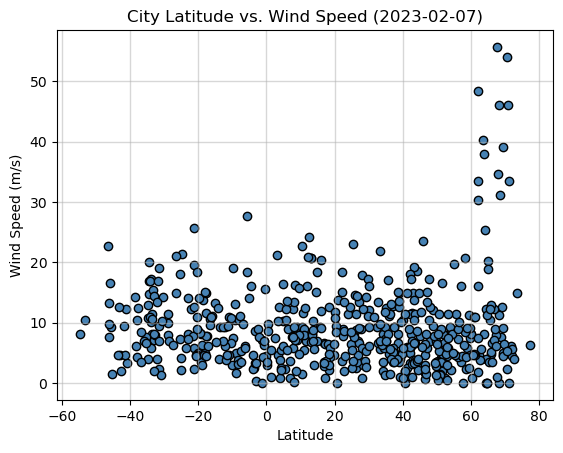

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor= "steelblue", edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle= '-', linewidth= 1, alpha= 0.5)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x,y)
    plt.plot(x, regress_values, "r-")
    print(f'The r-value is: {rvalue}')
    return line_eq

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tahta,26.7693,31.5021,56.37,37,100,6.96,EG,1675878430
1,tasiilaq,65.6145,-37.6368,3.36,54,0,10.40,GL,1675878431
8,paamiut,61.9940,-49.6678,24.33,86,100,33.38,GL,1675878434
9,maarianhamina,60.0973,19.9348,39.06,87,100,8.05,AX,1675878435
10,aklavik,68.2191,-135.0107,-20.20,76,100,0.00,CA,1675878435


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,henties bay,-22.1160,14.2845,65.30,84,61,12.17,NaN,1675878431
3,punta arenas,-53.1500,-70.9167,71.71,43,100,10.36,CL,1675878430
4,port-gentil,-0.7193,8.7815,84.16,79,40,6.91,GA,1675878432
5,cidreira,-30.1811,-50.2056,80.31,70,1,14.16,BR,1675878432
6,ushuaia,-54.8000,-68.3000,69.46,43,75,8.05,AR,1675878327


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8639329246629001


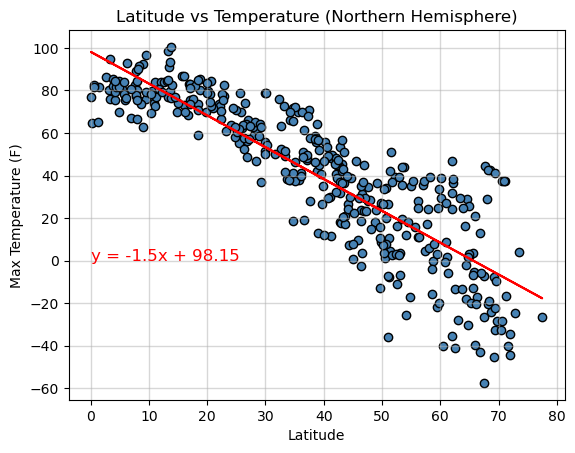

In [80]:
# Linear regression on Northern Hemisphere
#plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], facecolor= 'steelblue')
#equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
#plt.annotate(equation, (0,0), fontsize= 12, color= 'red')

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(x_values, y_values, facecolor= 'steelblue', edgecolors= 'black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (0,0), fontsize= 12, color= 'red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs Temperature (Northern Hemisphere)")
plt.grid(linestyle= '-', linewidth= 1, alpha= 0.5)
print(f'The r-value is: {rvalue}')
plt.show()


The r-value is: 0.48453329426058234


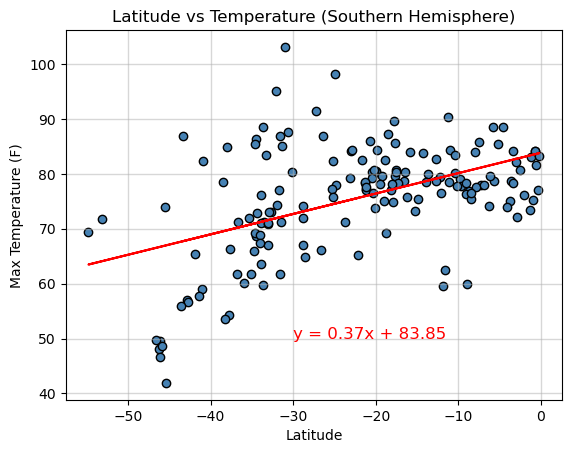

In [81]:
# Linear regression on Southern Hemisphere
#plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], facecolor= "steelblue")
#equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
#plt.annotate(equation, (50,-30), fontsize= 12, color= 'red')

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.scatter(x_values, y_values, facecolor= 'steelblue', edgecolors= 'black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (-30,50), fontsize= 12, color= 'red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs Temperature (Southern Hemisphere)")
plt.grid(linestyle= '-', linewidth= 1, alpha= 0.5)
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:**  
The r value attributed to the Northern Hemisphere graph (-0.86) shows that there is statistical significance to the line of regression because it is between |0.7 - 1|. As the x-values increase (increasing distance from the equator), the y-values decreased (decreasing maximum temperature) -- hence the negative r value and negative correlation.  
The Southern Hemisphere graph does not show as strong of a correlation (r value = 0.48). Because this value sits between |0 - 0.7| the data cannot be said to have statistical significance. Further analysis to determine outliers may be necessary to evaluate the data or another random sample could be drawn to re-evaluate the linear relationship between latitude and temperature in the Southern Hemisphere. There was a slight positive correlation: as the x-values increased (decreasing distance from the equator), the y-values increased as well (increasing maximum temperature) which was expected.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5229575928449368


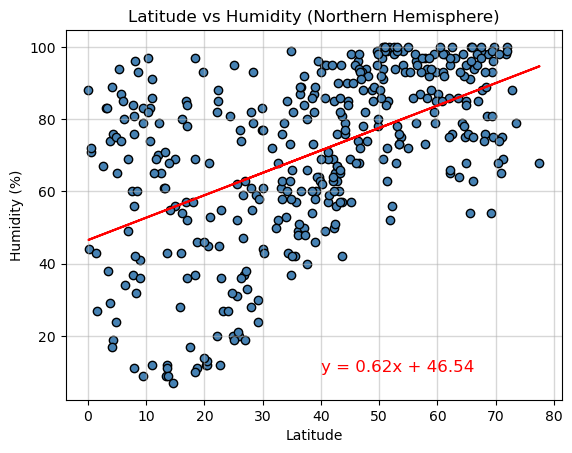

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.scatter(x_values, y_values, facecolor= 'steelblue', edgecolors= 'black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (40,10), fontsize= 12, color= 'red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity (Northern Hemisphere)")
plt.grid(linestyle= '-', linewidth= 1, alpha= 0.5)
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: 0.22338914547473343


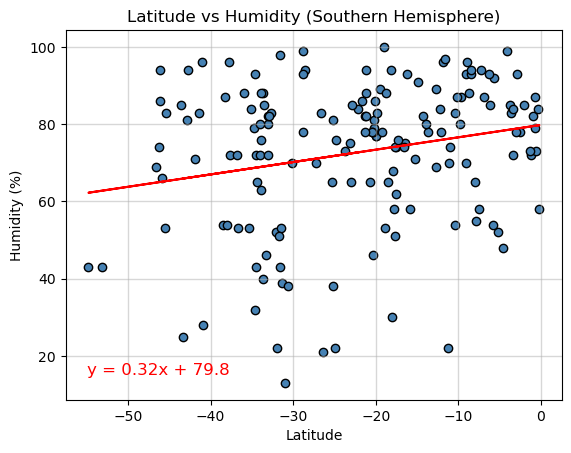

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.scatter(x_values, y_values, facecolor= 'steelblue', edgecolors= 'black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (-55,15), fontsize= 12, color= 'red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity (Southern Hemisphere)")
plt.grid(linestyle= '-', linewidth= 1, alpha= 0.5)
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:**  
The Northern Hemisphere r value (0.52) shows a slight positive correlation between increasing humidity and increasing latitude, but not a statistically significant correlation. Within the data, there was a slight increase in humidity levels as data points increased in distance from the equator.  
The Southern Hemmisphere graph shows a r value that has a very slight positive correlation that is not significant (0.22). In the Southern Hemisphere, the humidity levels slightly increase as one approaches the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.19595149928578875


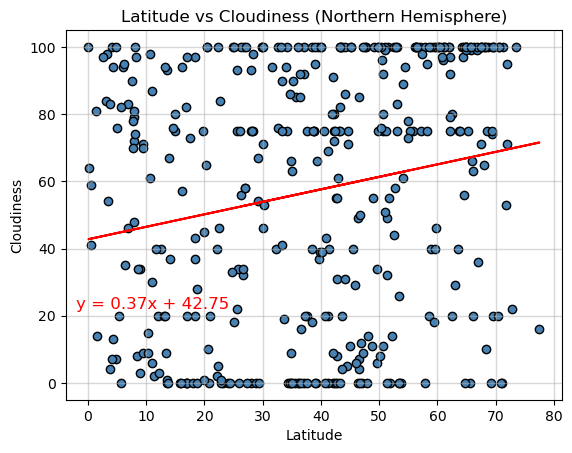

In [84]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.scatter(x_values, y_values, facecolor= 'steelblue', edgecolors= 'black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (-2,22), fontsize= 12, color= 'red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness (Northern Hemisphere)")
plt.grid(linestyle= '-', linewidth= 1, alpha= 0.5)
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: 0.21727521019460672


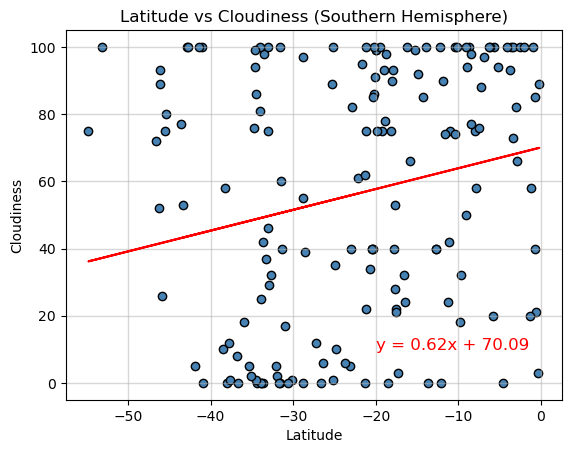

In [85]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.scatter(x_values, y_values, facecolor= 'steelblue', edgecolors= 'black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (-20,10), fontsize= 12, color= 'red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness (Southern Hemisphere)")
plt.grid(linestyle= '-', linewidth= 1, alpha= 0.5)
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:**  
When evaluating the possible relationship between latitude and cloudiness, both the Northern Hemisphere r value (0.195) and the Southern Hemisphere r value(0.217) showed a very minor positive correlation with no significance.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12335223759404854


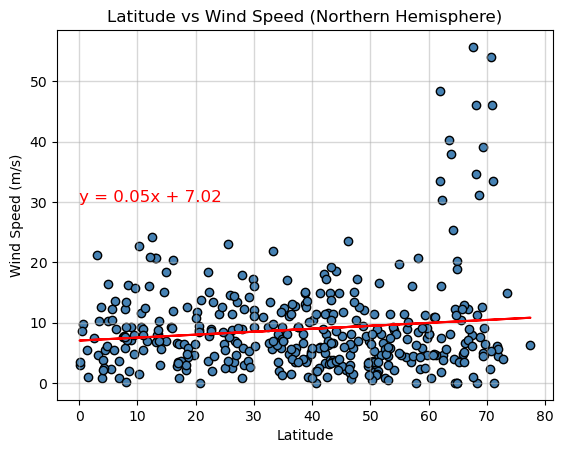

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.scatter(x_values, y_values, facecolor= 'steelblue', edgecolors= 'black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (0,30), fontsize= 12, color= 'red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs Wind Speed (Northern Hemisphere)")
plt.grid(linestyle= '-', linewidth= 1, alpha= 0.5)
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: -0.15119475843892197


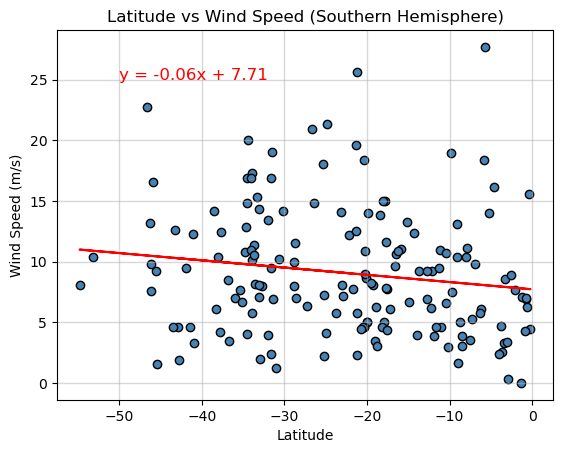

In [87]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.scatter(x_values, y_values, facecolor= 'steelblue', edgecolors= 'black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (-50,25), fontsize= 12, color= 'red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs Wind Speed (Southern Hemisphere)")
plt.grid(linestyle= '-', linewidth= 1, alpha= 0.5)
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:**  
The Northern Hemisphere r value (0.12) shows no correlation of significance between latitude and wind speed, though there was a minor positive correlation.  
The Southern Hemisphere r value (-0.15) also shows no correlation of significance; however, it has a minor negative correlation present.